In [46]:
!pip install numpy

In [47]:
import numpy as np

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
!pip install pandas

In [50]:
import pandas as pd

In [51]:
!pip install matplotlib

In [52]:
!pip install seaborn

In [53]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [54]:
housing = pd.DataFrame(pd.read_csv("C:/Users/LIKITHA M/Downloads/house-prices.csv"))

In [55]:
housing.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [56]:
housing.shape

(128, 8)

In [57]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [58]:
housing.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


In [59]:
housing.columns

Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

Data cleaning

In [60]:
housing.isnull().sum()*100/housing.shape[0] #check the null values &if there is no null value ,data is cleaned

Home            0.0
Price           0.0
SqFt            0.0
Bedrooms        0.0
Bathrooms       0.0
Offers          0.0
Brick           0.0
Neighborhood    0.0
dtype: float64

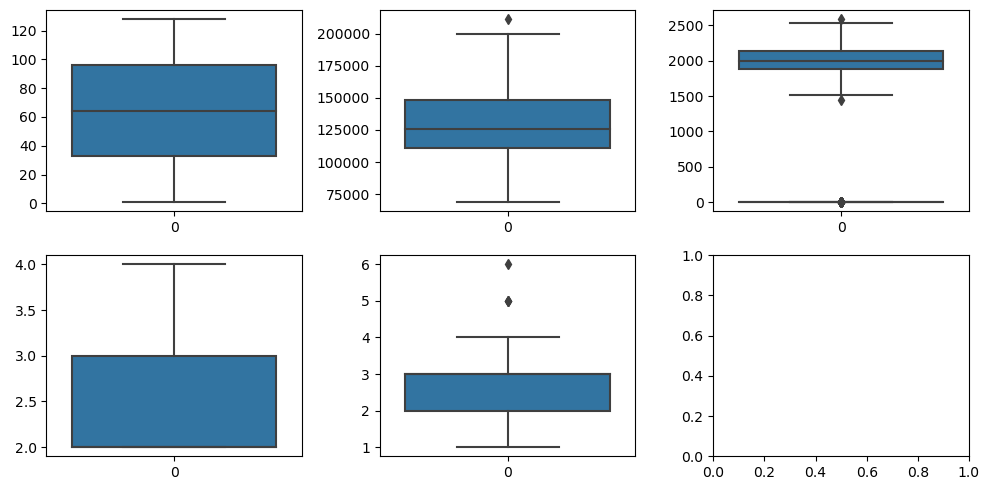

In [61]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['Home'], ax = axs[0,0])
plt2 = sns.boxplot(housing['Price'], ax = axs[0,1])
plt3 = sns.boxplot(housing['SqFt'], ax = axs[0,2])
plt1 = sns.boxplot(housing['Bedrooms'], ax = axs[0,2])
plt2 = sns.boxplot(housing['Bathrooms'], ax = axs[1,0])
plt3 = sns.boxplot(housing['Offers'], ax = axs[1,1])

plt.tight_layout()

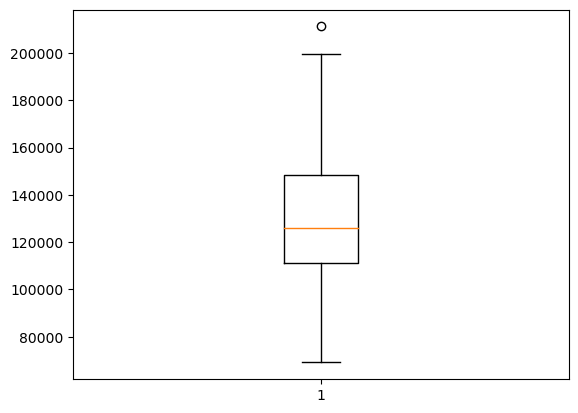

In [62]:
plt.boxplot(housing.Price)
Q1 = housing.Price.quantile(0.25)
Q3 = housing.Price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.Price >= Q1 - 1.5*IQR) & (housing.Price <= Q3 + 1.5*IQR)]

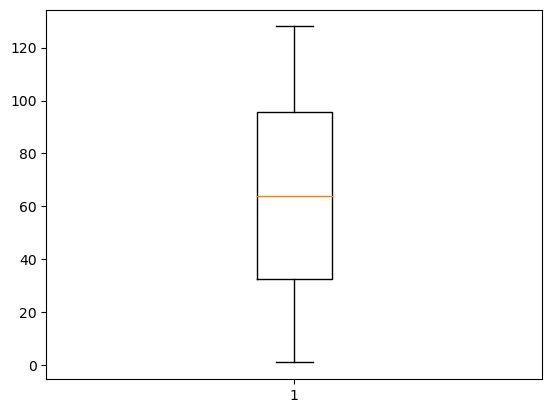

In [63]:
plt.boxplot(housing.Home)
Q1 = housing.Home.quantile(0.25)
Q3 = housing.Home.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.Home >= Q1 - 1.5*IQR) & (housing.Home <= Q3 + 1.5*IQR)]

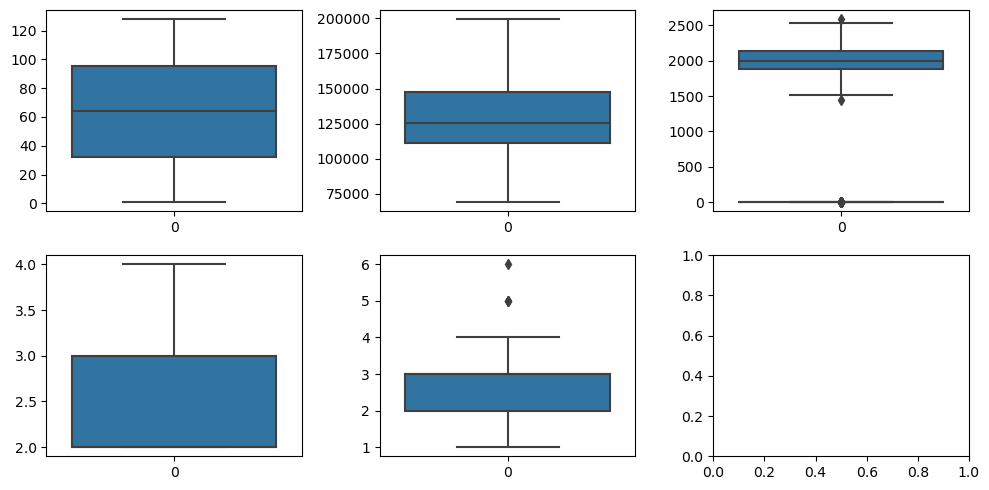

In [64]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['Home'], ax = axs[0,0])
plt2 = sns.boxplot(housing['Price'], ax = axs[0,1])
plt3 = sns.boxplot(housing['SqFt'], ax = axs[0,2])
plt1 = sns.boxplot(housing['Bedrooms'], ax = axs[0,2])
plt2 = sns.boxplot(housing['Bathrooms'], ax = axs[1,0])
plt3 = sns.boxplot(housing['Offers'], ax = axs[1,1])

plt.tight_layout()

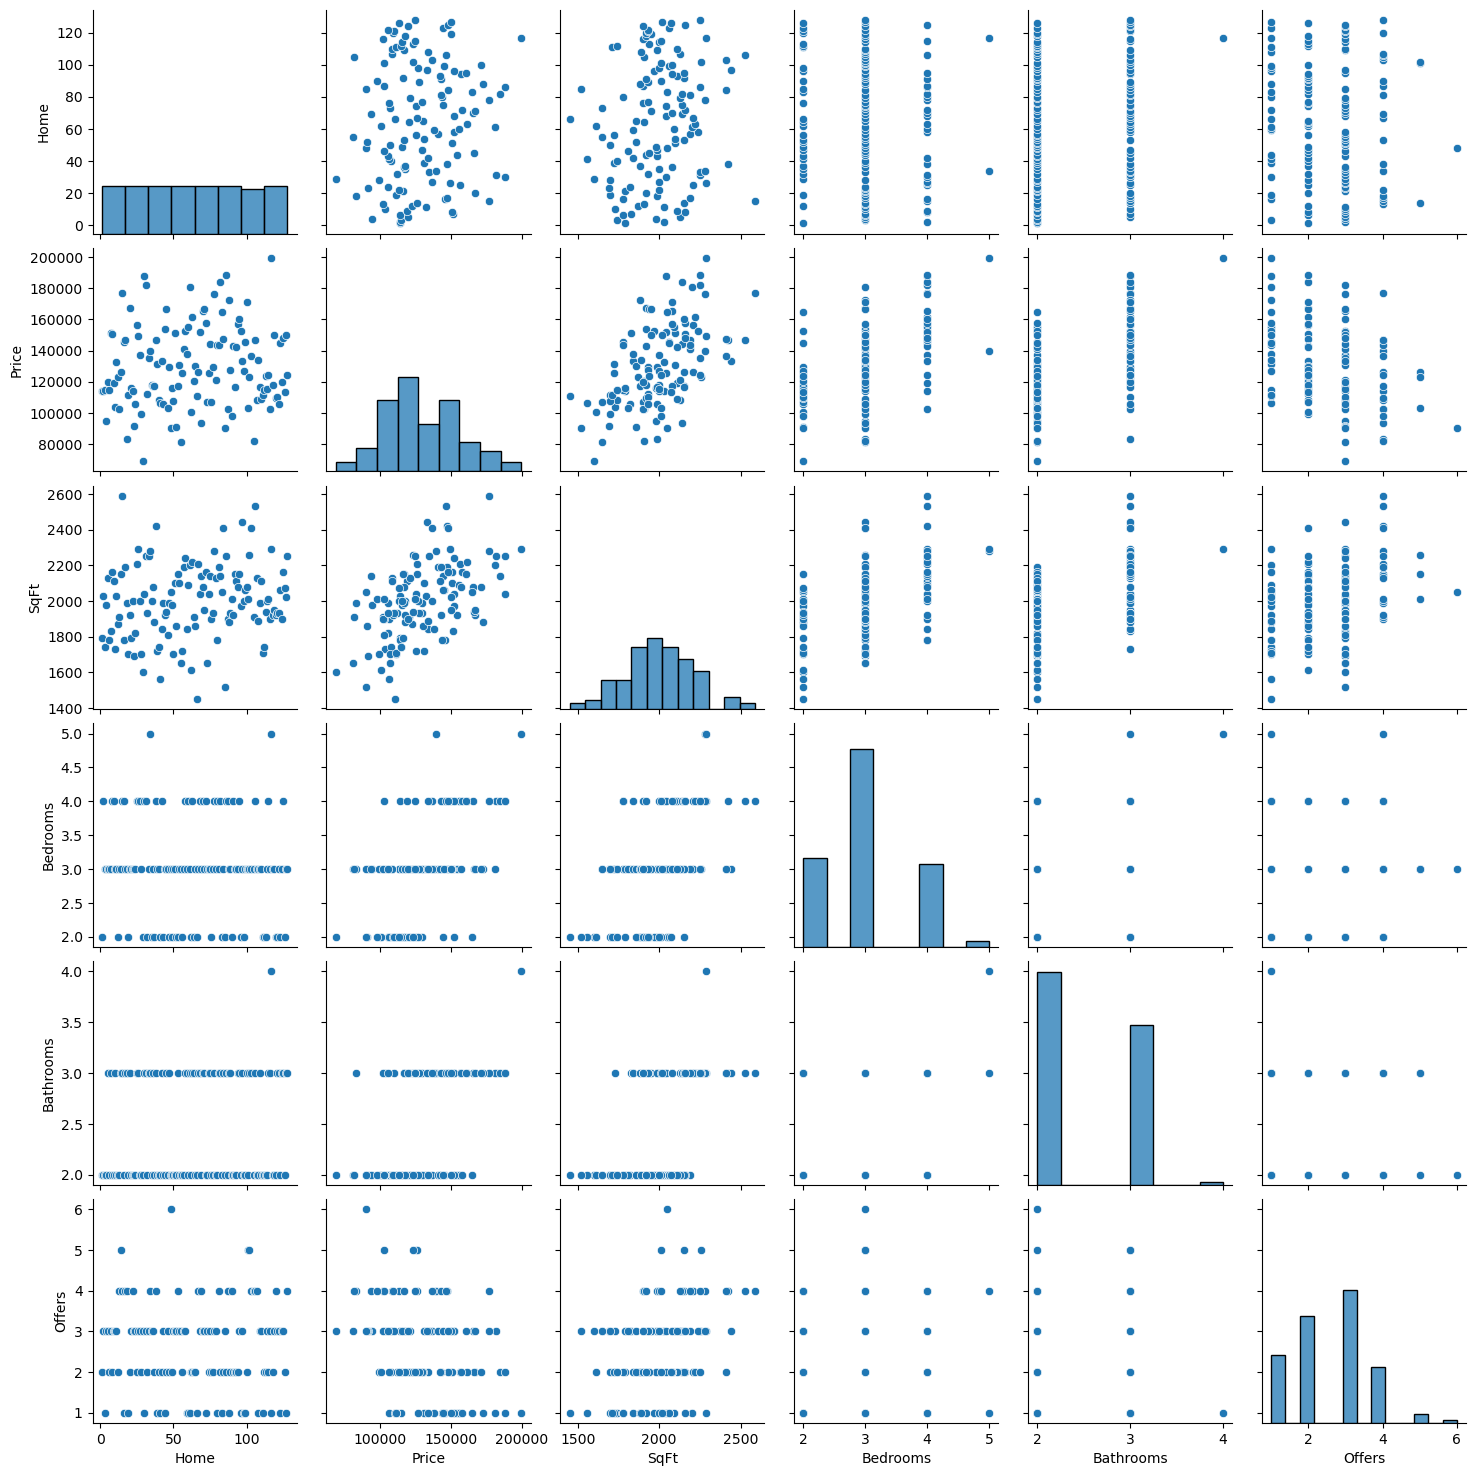

In [65]:
sns.pairplot(housing)
plt.show()

<Axes: xlabel='Neighborhood', ylabel='Price'>

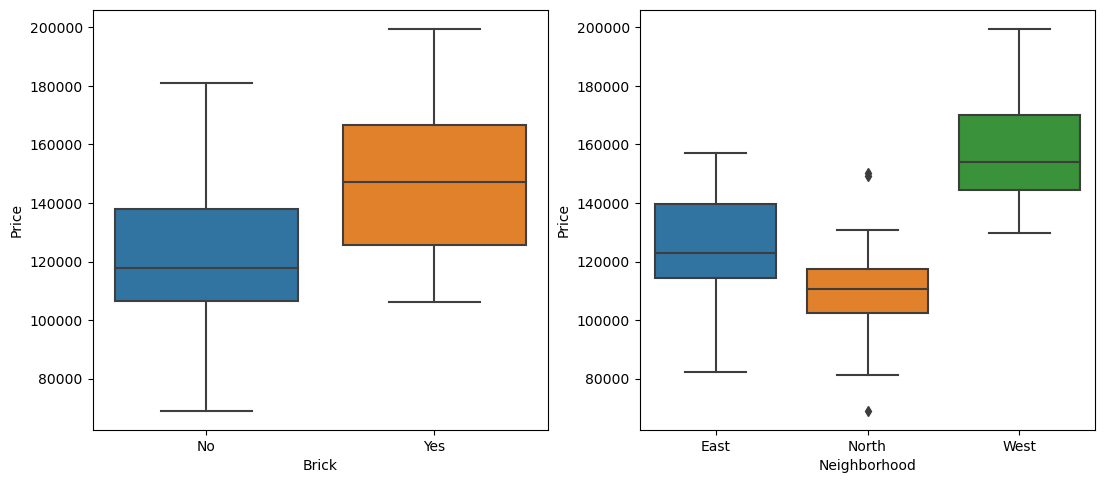

In [66]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Brick', y = 'Price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'Neighborhood', y = 'Price', data = housing)

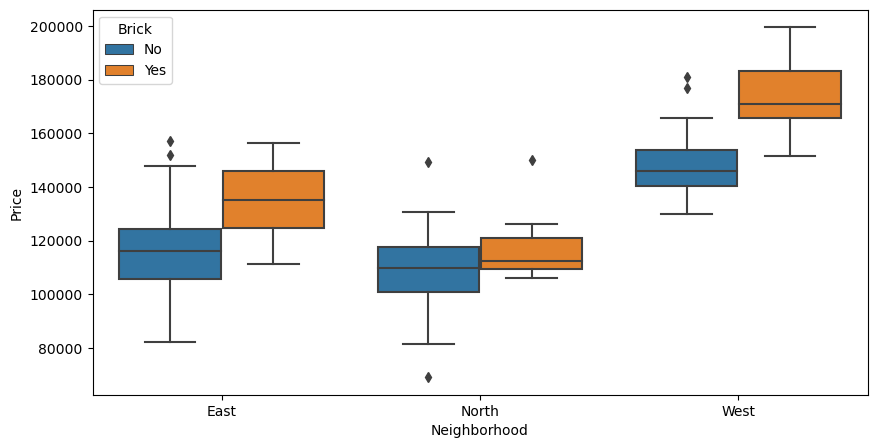

In [67]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'Neighborhood', y = 'Price', hue = 'Brick', data = housing)
plt.show()

data preparation

In [68]:
varlist =  ['Brick', 'Neighborhood']

def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [69]:
housing.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,NaN,NaN
1,2,114200,2030,4,2,3,NaN,NaN
2,3,114800,1740,3,2,1,NaN,NaN
3,4,94700,1980,3,2,3,NaN,NaN
4,5,119800,2130,3,3,3,NaN,NaN


In [70]:
status = pd.get_dummies(housing['Neighborhood'])

In [71]:
status.head()

""
0
1
2
3
4


In [72]:
status = pd.get_dummies(housing['Neighborhood'], drop_first = True)

In [73]:
housing = pd.concat([housing, status], axis = 1)

In [74]:
housing.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,NaN,NaN
1,2,114200,2030,4,2,3,NaN,NaN
2,3,114800,1740,3,2,1,NaN,NaN
3,4,94700,1980,3,2,3,NaN,NaN
4,5,119800,2130,3,3,3,NaN,NaN


In [75]:
housing.drop(['Neighborhood'], axis = 1, inplace = True)

In [76]:
housing.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick
0,1,114300,1790,2,2,2,NaN
1,2,114200,2030,4,2,3,NaN
2,3,114800,1740,3,2,1,NaN
3,4,94700,1980,3,2,3,NaN
4,5,119800,2130,3,3,3,NaN


spliting data into training and testing set

In [77]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [78]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
scaler = MinMaxScaler()

In [80]:
num_vars = ['Home', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers','Price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [81]:
df_train.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick
78,0.614173,0.332765,0.596491,0.333333,0.0,0.4,NaN
110,0.866142,0.250000,0.228070,0.000000,0.0,0.0,NaN
20,0.157480,0.289249,0.298246,0.333333,0.0,0.4,NaN
69,0.543307,0.710751,0.552632,0.666667,0.5,0.4,NaN
6,0.047244,0.591297,0.333333,0.333333,0.5,0.4,NaN


In [82]:
df_train.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,0.0
mean,0.504921,0.414715,0.473784,0.333333,0.210227,0.295455,NaN
std,0.303279,0.212976,0.176767,0.231603,0.259549,0.220714,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.242126,0.254480,0.392544,0.333333,0.000000,0.200000,NaN
50%,0.507874,0.372440,0.478070,0.333333,0.000000,0.200000,NaN
75%,0.753937,0.577432,0.596491,0.333333,0.500000,0.400000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


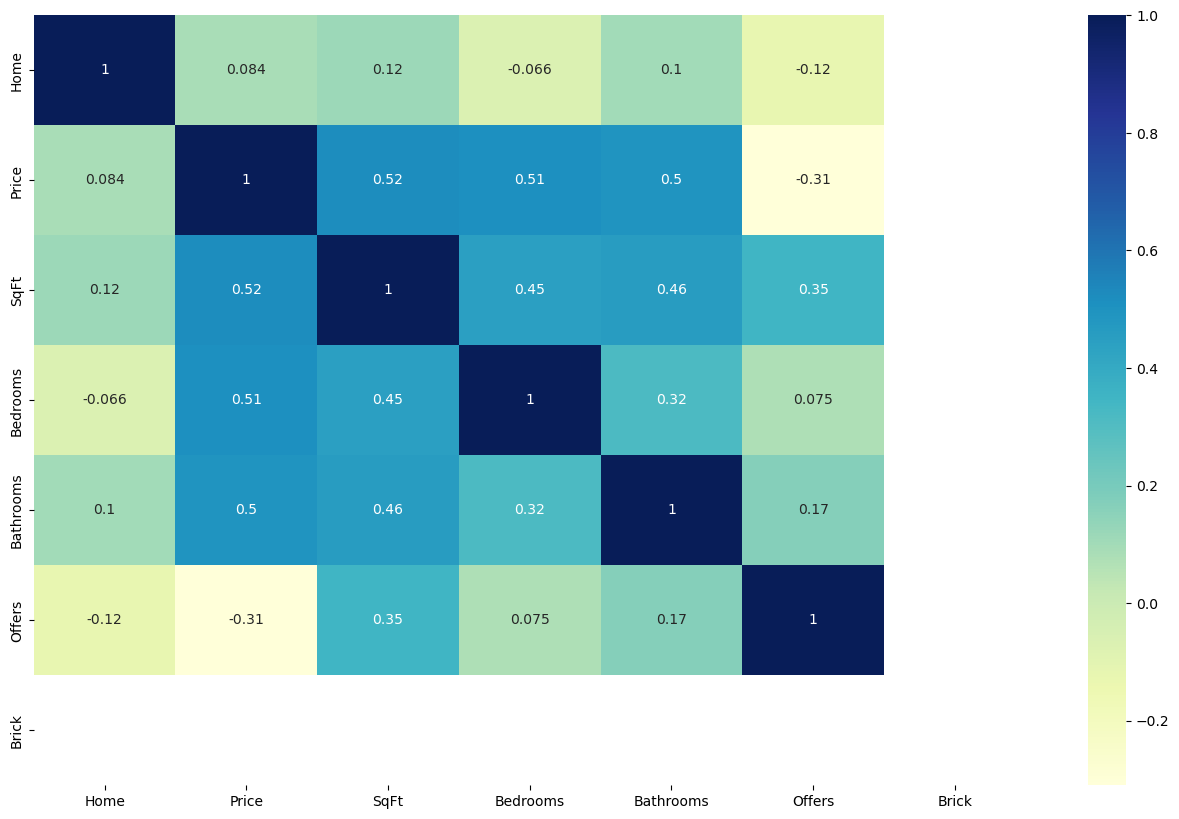

In [83]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

model building-x and y sets

In [94]:
x=housing[['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers']]
y=housing['Price']


In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=101)

In [97]:
x_train

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
101,102,123100,2260,3,3,5
37,38,147000,2420,4,3,4
47,48,90300,2050,3,2,6
46,47,129800,1990,2,3,2
23,24,106100,1820,3,2,3
...,...,...,...,...,...,...
63,64,120500,1910,2,3,2
70,71,166700,1950,3,3,3
81,82,184300,2140,4,3,2
11,12,123000,1870,2,2,2


In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
lm=LinearRegression()

In [101]:
lm.fit(x_train,y_train)

LinearRegression()

In [102]:
coeff=pd.DataFrame(lm.coef_,x.columns,columns=['coefficient'])

In [103]:
coeff

,coefficient
Home,8.237089e-15
Price,1.000000e+00
SqFt,7.450787e-15
Bedrooms,4.109368e-13
Bathrooms,9.555523e-13
Offers,1.567117e-12


In [104]:
prediction=lm.predict(x_test)

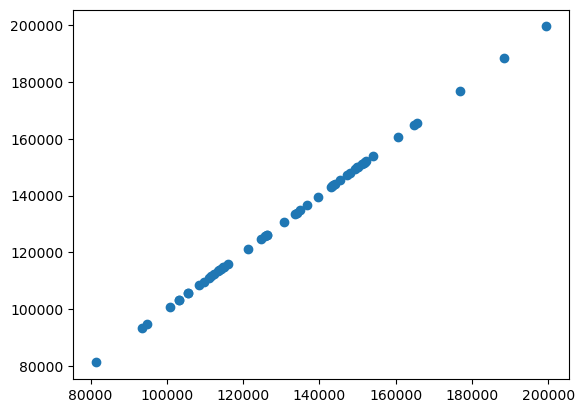

In [107]:
plt.scatter(y_test, prediction)

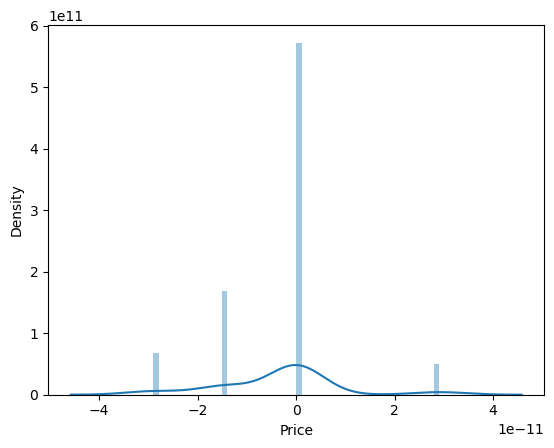

In [108]:
sns.distplot((y_test-prediction),bins=50);